In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-darkgrid')

In [2]:
red_df = pd.read_csv("data/winequality-red.csv", sep = ";")

## **1. EXPLORE THE DATA TO GAIN INSIGHT**

In [3]:
red_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
red_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [5]:
red_df.nunique()

fixed acidity            96
volatile acidity        143
citric acid              80
residual sugar           91
chlorides               153
free sulfur dioxide      60
total sulfur dioxide    144
density                 436
pH                       89
sulphates                96
alcohol                  65
quality                   6
dtype: int64

In [6]:
red_df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


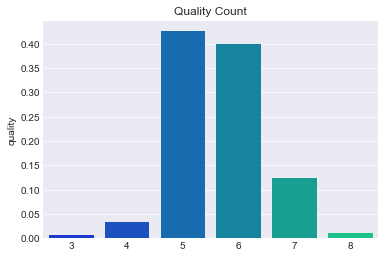

In [7]:
sns.barplot(x = red_df["quality"].value_counts(normalize = True).index, y = red_df["quality"].value_counts(normalize = True), palette = "winter")
plt.title("Quality Count")
plt.show()

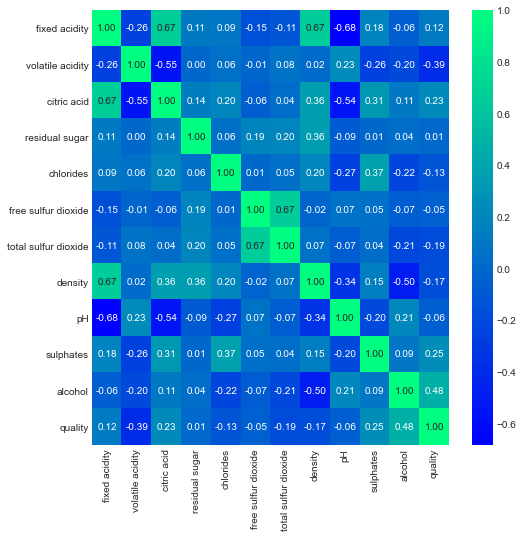

In [8]:
plt.figure(figsize = (8, 8))
sns.heatmap(red_df.corr(), annot = True, fmt = ".2f", cmap = "winter")
plt.show()

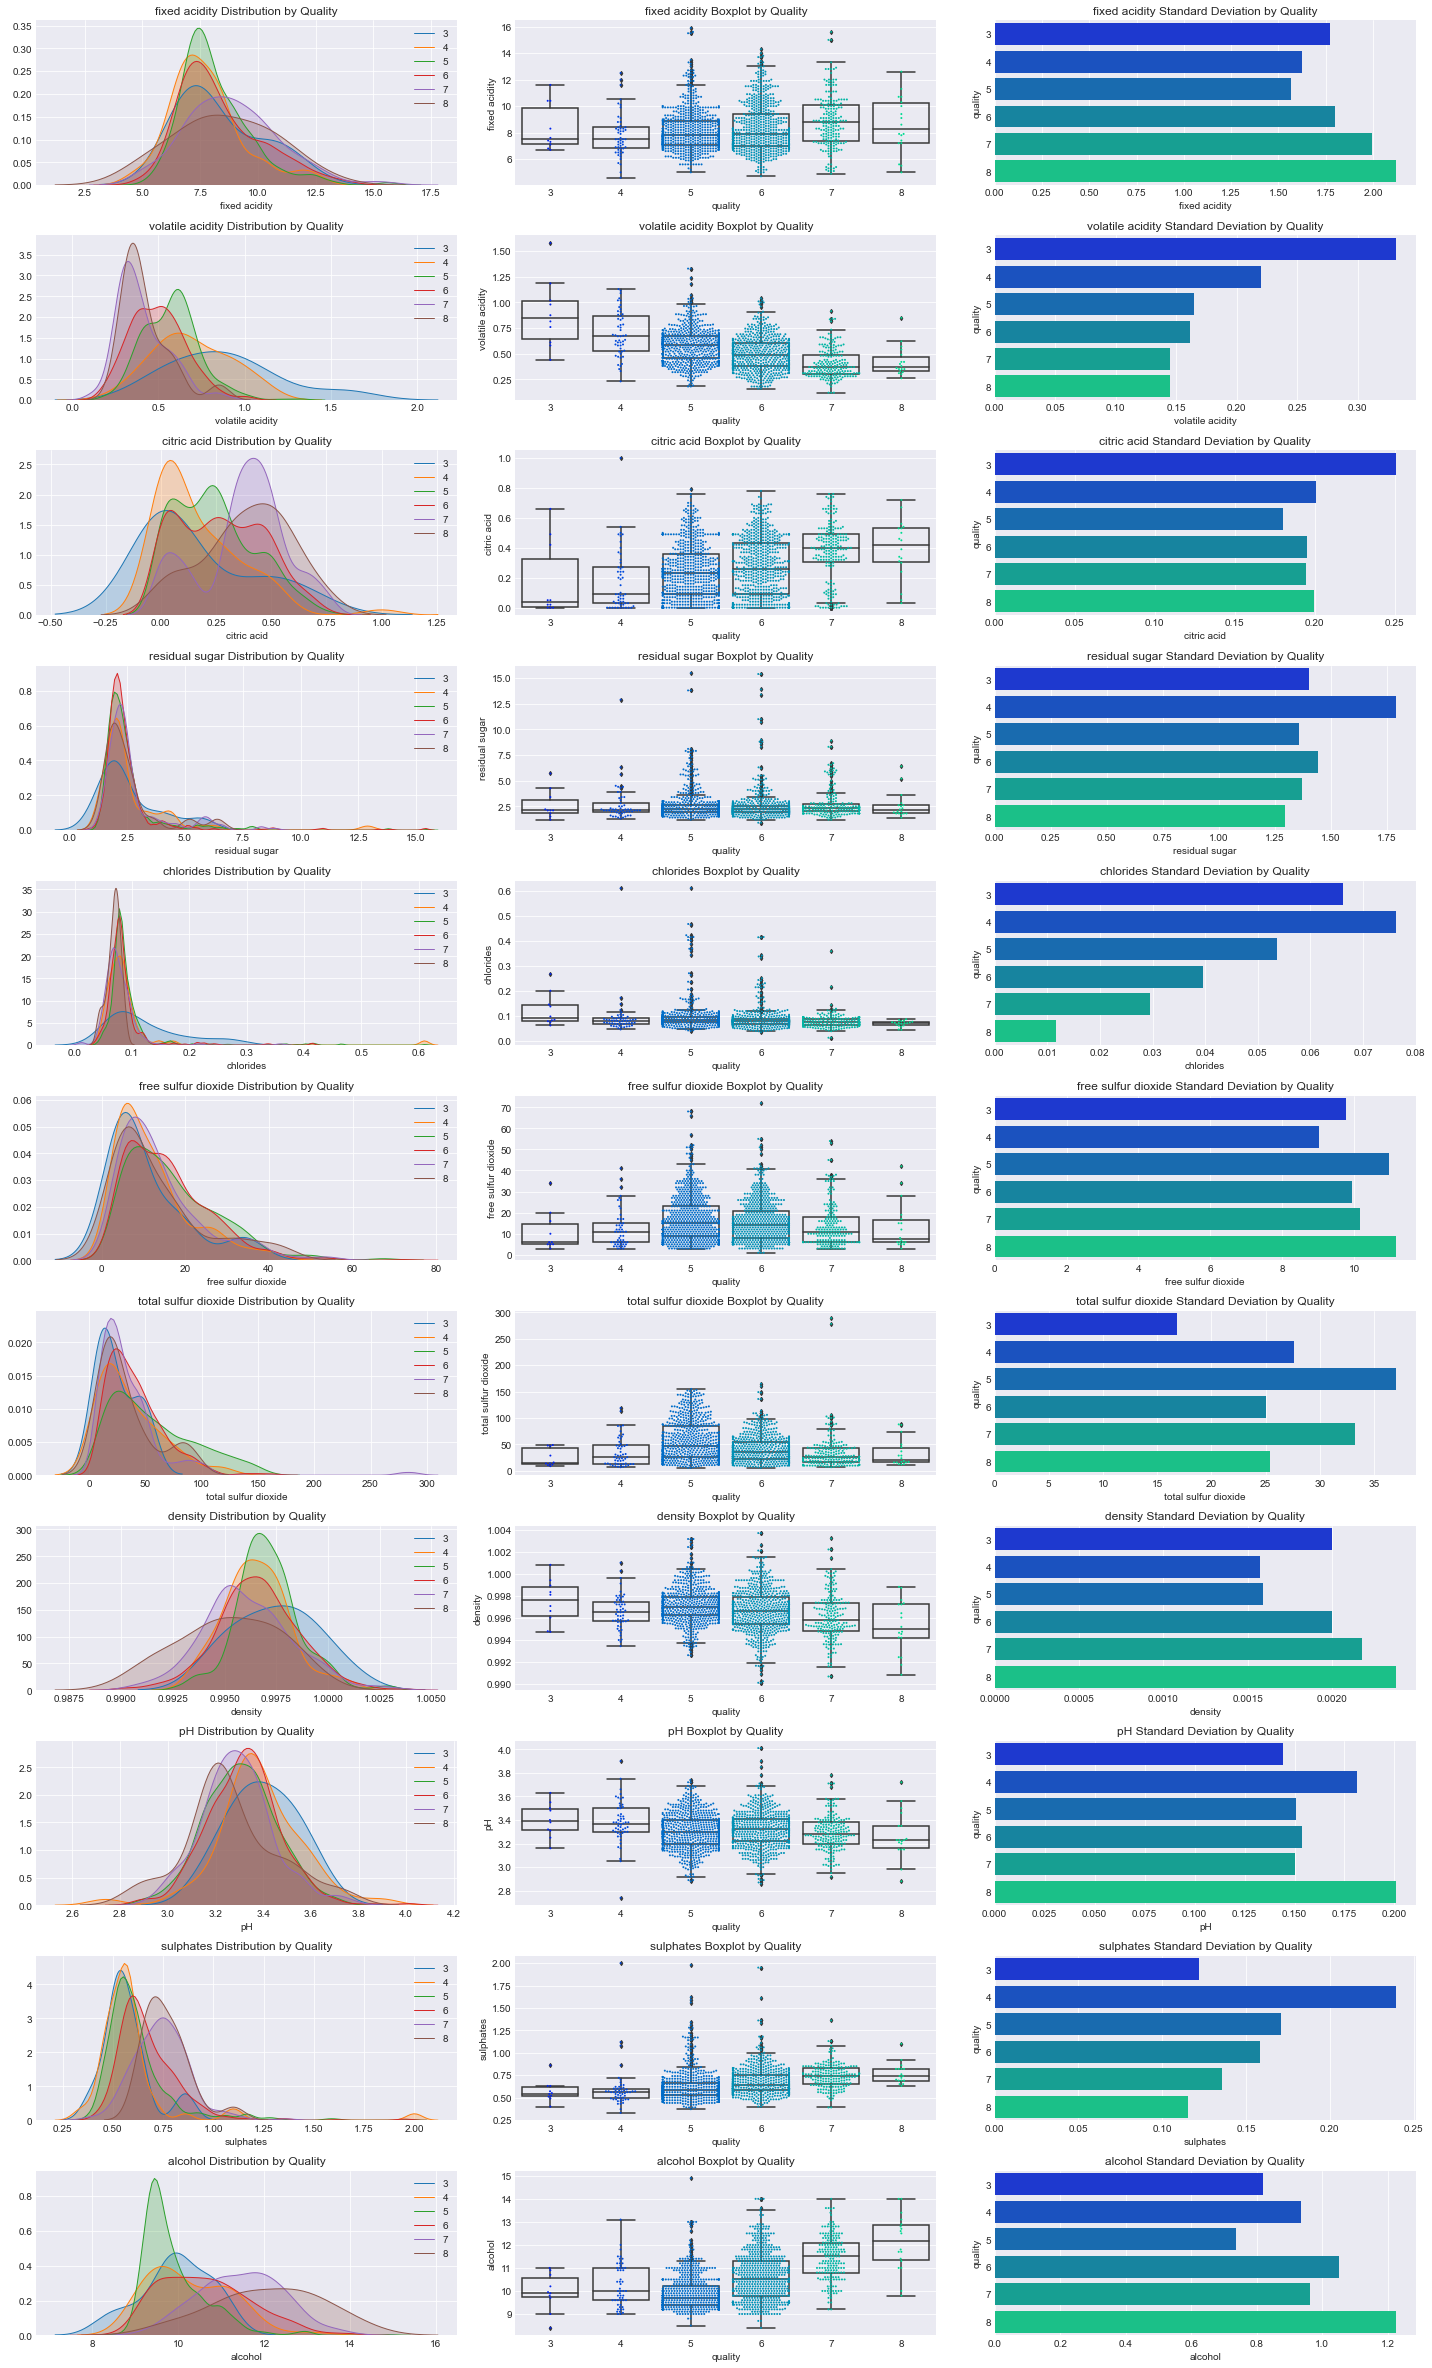

In [9]:
fig, ax = plt.subplots(11, 3, figsize = (20, 33))
columns = red_df.columns[:-1]
for row in range(11):
    for qual in range(3, 9):
        sns.distplot(red_df[red_df["quality"] == qual][columns[row]], hist = False, kde_kws = {"shade": True, "linewidth": 1}, label = qual, ax = ax[row, 0])
    sns.boxplot(x = "quality", y = columns[row], data = red_df, fliersize = 3, boxprops={'facecolor':'None'}, palette = "winter", ax = ax[row, 1])
    sns.swarmplot(x = "quality", y = columns[row], data = red_df, size = 2, palette = "winter", ax = ax[row, 1])
    sns.barplot(x = columns[row], y = "quality", data = red_df.groupby("quality").std().reset_index(), orient = "h", palette = "winter", ax = ax[row, 2])
    ax[row, 0].set_title(columns[row] + " Distribution by Quality")
    ax[row, 1].set_title(columns[row] + " Boxplot by Quality")
    ax[row, 2].set_title(columns[row] + " Standard Deviation by Quality")
plt.tight_layout()
plt.show()
fig.savefig('data_distribution_wine_quality.png')

## **2. PREPARE THE DATA**

### FEATURE ENGINEERING

In [10]:
red_df["quality"] = red_df["quality"].map(lambda x: 0 if x <= 5 else 1)

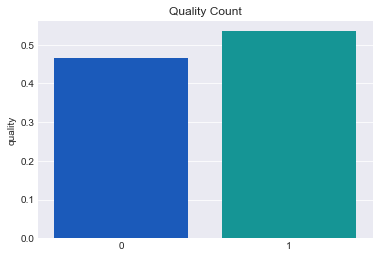

In [11]:
sns.barplot(x = red_df["quality"].value_counts(normalize = True).index, y = red_df["quality"].value_counts(normalize = True), palette = "winter")
plt.title("Quality Count")
plt.show()

### FEATURE SCALING

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [13]:
X = red_df.drop("quality", axis = 1).values
y = red_df["quality"].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [14]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## **3. EXPLORE MANY DIFFERENT MODEL**

In [53]:
# Algorithm
from sklearn.linear_model import LogisticRegression, RidgeClassifier, SGDClassifier, Perceptron, PassiveAggressiveClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB, CategoricalNB, BernoulliNB
from sklearn.tree import DecisionTreeClassifier

# Dimensionality Reduction
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis

#Metrics
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, plot_confusion_matrix, roc_curve, precision_recall_curve

#Validation
from sklearn.model_selection import cross_validate, cross_val_predict

#Hyper Parameter
from sklearn.model_selection import GridSearchCV

#Ensemble
from sklearn.ensemble import VotingClassifier

In [64]:
algorithm = {
    'Logistic Regression': LogisticRegression(solver = "saga", max_iter = 2000),
    'Ridge Classifier': RidgeClassifier(),
    'K Neighbors Classifier': KNeighborsClassifier(),
    'SGD Classifier': SGDClassifier(),
    'Perceptron': Perceptron(),
    'Passive Aggressive Classifier': PassiveAggressiveClassifier(),
    'Linear Discriminant Analysis': LinearDiscriminantAnalysis(),
    'Quadratic Discriminant Analysis': QuadraticDiscriminantAnalysis(),
    'SVC': SVC(),
    'Gaussian NB': GaussianNB(),
#     'Categorical NB': CategoricalNB(alpha = 2),
    'Bernoulli NB': BernoulliNB(),
    'Decision Tree Classifier': DecisionTreeClassifier()
}

In [65]:
def get_scoring(model):
    scores = {}
    score = cross_validate(estimator = model, X = X_train, y = y_train, cv = 10,
                  scoring = ['accuracy', "f1", "recall", "precision", "roc_auc"])
    for key, value in score.items():
        scores[key] = (round(value.mean(),4))
        scores[key + 'std'] = (round(value.std(),4))
    return scores

In [66]:
results = {}
parameter = None
for key, value in algorithm.items():
    results[key] = get_scoring(value)
results = pd.DataFrame(results)
results = results.rename(index = {'fit_time': 'Fit Time',
                                  'score_time': 'Score Time',
                                  'test_accuracy': 'Accuracy',
                                  'test_f1': 'F1',
                                  'test_recall': 'Recall',
                                  'test_precision': 'Precision',
                                  'test_roc_auc': 'AUC',
                                  'score_timestd': 'Score Time Std',
                                  'test_accuracystd': 'Accuracy Std',
                                  'test_f1std': 'F1 Std',
                                  'test_recallstd': 'Recall Std',
                                  'test_precisionstd': 'Precision Std',
                                  'test_roc_aucstd': 'AUC Std'
                                 })

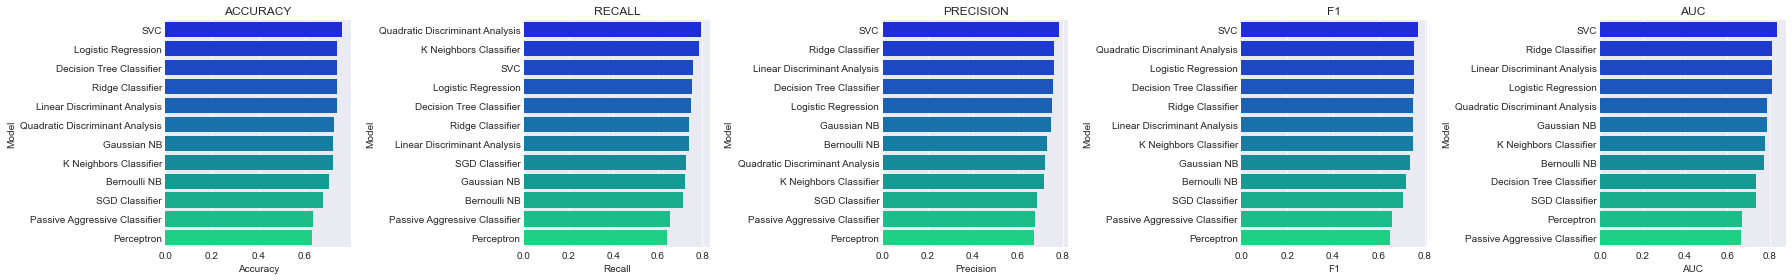

In [67]:
results = results.T.reset_index()
results.rename(columns = {'index': 'Model'}, inplace = True)
results.drop(['Fit Time', 'fit_timestd', 'Score Time', 'Score Time Std'], axis = 1, inplace = True)

# ALGORITHM COMPARISON
fig, ax = plt.subplots(1, 5, figsize = (25, 4))
sns.barplot(x = 'Accuracy', y = 'Model', data = results.sort_values('Accuracy', ascending = False), palette = 'winter', ax = ax[0])
sns.barplot(x = 'Recall', y = 'Model', data = results.sort_values('Recall', ascending = False), palette = 'winter', ax = ax[1])
sns.barplot(x = 'Precision', y = 'Model', data = results.sort_values('Precision', ascending = False), palette = 'winter', ax = ax[2])
sns.barplot(x = 'F1', y = 'Model', data = results.sort_values('F1', ascending = False), palette = 'winter', ax = ax[3])
sns.barplot(x = 'AUC', y = 'Model', data = results.sort_values('AUC', ascending = False), palette = 'winter', ax = ax[4])
ax[0].set_title("ACCURACY")
ax[1].set_title("RECALL")
ax[2].set_title("PRECISION")
ax[3].set_title("F1")
ax[4].set_title("AUC")
plt.tight_layout()
plt.show()

In [68]:
results

,Model,Accuracy,Accuracy Std,F1,F1 Std,Recall,Recall Std,Precision,Precision Std,AUC,AUC Std
0,Logistic Regression,0.7373,0.0272,0.7537,0.0282,0.7541,0.0399,0.7543,0.0266,0.8095,0.0270
1,Ridge Classifier,0.7365,0.0266,0.7494,0.0284,0.7395,0.0403,0.7607,0.0254,0.8108,0.0269
2,K Neighbors Classifier,0.7186,0.0382,0.7483,0.0325,0.7832,0.0372,0.7173,0.0380,0.7783,0.0509
3,SGD Classifier,0.6756,0.0370,0.7045,0.0385,0.7279,0.0679,0.6855,0.0314,0.7336,0.0443
4,Perceptron,0.6318,0.0677,0.6472,0.0657,0.6417,0.1198,0.6712,0.0835,0.6693,0.0974
5,Passive Aggressive Classifier,0.6349,0.0601,0.6569,0.0439,0.6545,0.0903,0.6755,0.0920,0.6664,0.0739
6,Linear Discriminant Analysis,0.7365,0.0266,0.7494,0.0284,0.7395,0.0403,0.7607,0.0254,0.8108,0.0269
7,Quadratic Discriminant Analysis,0.7248,0.0276,0.7541,0.0269,0.7922,0.0484,0.7214,0.0275,0.7874,0.0269
8,SVC,0.7592,0.0341,0.7710,0.0305,0.7585,0.0347,0.7853,0.0422,0.8327,0.0312
9,Gaussian NB,0.7217,0.0229,0.7344,0.0229,0.7219,0.0422,0.7500,0.0311,0.7866,0.0278


**LOGISTIC REGRESSION**

In [21]:
lr = LogisticRegression(penalty = "elasticnet", solver = "saga", max_iter = 5000)
parameters = {"C": np.linspace(0.2, 1, 5), "l1_ratio": np.linspace(0, 1, 6)}
gscv = GridSearchCV(lr, param_grid = parameters, cv = 10, return_train_score = True, scoring = "accuracy")
gscv.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=LogisticRegression(max_iter=5000, penalty='elasticnet',
                                          solver='saga'),
             param_grid={'C': array([0.2, 0.4, 0.6, 0.8, 1. ]),
                         'l1_ratio': array([0. , 0.2, 0.4, 0.6, 0.8, 1. ])},
             return_train_score=True, scoring='accuracy')

In [22]:
gscv_res = pd.DataFrame(gscv.cv_results_).sort_values("rank_test_score")
gscv_res.head(1)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_l1_ratio,params,split0_test_score,split1_test_score,split2_test_score,...,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
4,0.013679,0.004844,0.000798,0.000399,0.2,0.8,"{'C': 0.2, 'l1_ratio': 0.8}",0.734375,0.773438,0.742188,...,0.747176,0.748914,0.743701,0.748914,0.743701,0.746308,0.747176,0.74566,0.746243,0.001913


In [23]:
lr = LogisticRegression(penalty = "elasticnet", solver = "saga", max_iter = 5000, C = 0.2, l1_ratio = 0.8)
lr.fit(X_train, y_train)

LogisticRegression(C=0.2, l1_ratio=0.8, max_iter=5000, penalty='elasticnet',
                   solver='saga')

              precision    recall  f1-score   support

           0       0.72      0.74      0.73       596
           1       0.77      0.75      0.76       683

    accuracy                           0.75      1279
   macro avg       0.74      0.74      0.74      1279
weighted avg       0.75      0.75      0.75      1279



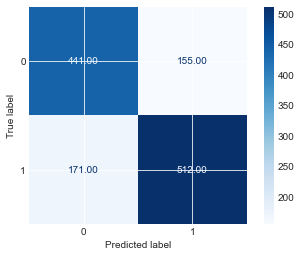

In [24]:
y_pred = lr.predict(X_train)
print(classification_report(y_train, y_pred))
plot_confusion_matrix(lr, X_train, y_train, cmap = plt.cm.Blues, values_format = '.2f')
plt.show()

**RIDGE**

In [70]:
rc = RidgeClassifier()
parameters = {"alpha": range(1, 6)}
gscv = GridSearchCV(rc, param_grid = parameters, cv = 10, return_train_score = True, scoring = "accuracy")
gscv.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=RidgeClassifier(),
             param_grid={'alpha': range(1, 6)}, return_train_score=True,
             scoring='accuracy')

In [71]:
gscv_res = pd.DataFrame(gscv.cv_results_).sort_values("rank_test_score")
gscv_res.head(1)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.005158,0.001944,0.000585,0.000481,1,{'alpha': 1},0.726562,0.765625,0.75,0.703125,...,0.742832,0.747176,0.742832,0.749783,0.74457,0.74457,0.74457,0.746528,0.745461,0.002915


In [74]:
rc = RidgeClassifier(alpha = 1)
rc.fit(X_train, y_train)

RidgeClassifier(alpha=1)

              precision    recall  f1-score   support

           0       0.72      0.74      0.73       596
           1       0.77      0.74      0.76       683

    accuracy                           0.74      1279
   macro avg       0.74      0.74      0.74      1279
weighted avg       0.74      0.74      0.74      1279



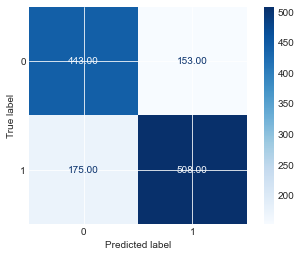

In [75]:
y_pred = rc.predict(X_train)
print(classification_report(y_train, y_pred))
plot_confusion_matrix(rc, X_train, y_train, cmap = plt.cm.Blues, values_format = '.2f')
plt.show()

**KNN**

In [76]:
knn = KNeighborsClassifier()
parameters = {"p": [1, 2], "n_neighbors": list(range(1, 21)), "leaf_size": np.linspace(20, 40, 21)}
gscv = GridSearchCV(knn, param_grid = parameters, cv = 10, scoring = "accuracy")
gscv.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'leaf_size': array([20., 21., 22., 23., 24., 25., 26., 27., 28., 29., 30., 31., 32.,
       33., 34., 35., 36., 37., 38., 39., 40.]),
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20],
                         'p': [1, 2]},
             scoring='accuracy')

In [77]:
gscv_res = pd.DataFrame(gscv.cv_results_).sort_values("rank_test_score")
gscv_res.head(5)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_leaf_size,param_n_neighbors,param_p,params,split0_test_score,split1_test_score,...,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
147,0.003294,0.000455,0.011097,0.001043,23,14,2,"{'leaf_size': 23.0, 'n_neighbors': 14, 'p': 2}",0.695312,0.789062,...,0.710938,0.75,0.742188,0.789062,0.75,0.695312,0.755906,0.743559,0.032095,1
787,0.002895,0.000543,0.010271,0.001003,39,14,2,"{'leaf_size': 39.0, 'n_neighbors': 14, 'p': 2}",0.695312,0.789062,...,0.710938,0.75,0.742188,0.789062,0.75,0.695312,0.755906,0.743559,0.032095,1
267,0.003394,0.000486,0.010794,0.000606,26,14,2,"{'leaf_size': 26.0, 'n_neighbors': 14, 'p': 2}",0.695312,0.789062,...,0.710938,0.75,0.742188,0.789062,0.75,0.695312,0.755906,0.743559,0.032095,1
387,0.003492,0.000501,0.011069,0.000687,29,14,2,"{'leaf_size': 29.0, 'n_neighbors': 14, 'p': 2}",0.695312,0.789062,...,0.710938,0.75,0.742188,0.789062,0.75,0.695312,0.755906,0.743559,0.032095,1
347,0.003266,0.000487,0.010770,0.000399,28,14,2,"{'leaf_size': 28.0, 'n_neighbors': 14, 'p': 2}",0.695312,0.789062,...,0.710938,0.75,0.742188,0.789062,0.75,0.695312,0.755906,0.743559,0.032095,1


In [78]:
knn = KNeighborsClassifier(n_neighbors = 14, leaf_size = 23, p = 2)
knn.fit(X_train, y_train)

KNeighborsClassifier(leaf_size=23, n_neighbors=14)

              precision    recall  f1-score   support

           0       0.77      0.76      0.76       596
           1       0.79      0.80      0.79       683

    accuracy                           0.78      1279
   macro avg       0.78      0.78      0.78      1279
weighted avg       0.78      0.78      0.78      1279



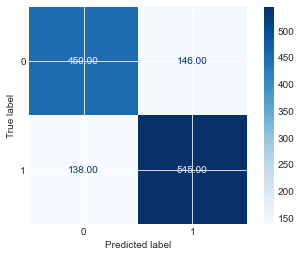

In [79]:
y_pred = knn.predict(X_train)
print(classification_report(y_train, y_pred))
plot_confusion_matrix(knn, X_train, y_train, cmap = plt.cm.Blues, values_format = '.2f')
plt.show()

**SGD**

In [80]:
sgd = SGDClassifier(penalty = "elasticnet")
parameters = {"l1_ratio": np.linspace(0, 1, 6)}
gscv = GridSearchCV(sgd, param_grid = parameters, cv = 10, return_train_score = True, scoring = "accuracy")
gscv.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=SGDClassifier(penalty='elasticnet'),
             param_grid={'l1_ratio': array([0. , 0.2, 0.4, 0.6, 0.8, 1. ])},
             return_train_score=True, scoring='accuracy')

In [81]:
gscv_res = pd.DataFrame(gscv.cv_results_).sort_values("rank_test_score")
gscv_res.head(1)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_l1_ratio,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
3,0.011668,0.002787,0.000417,0.000513,0.6,{'l1_ratio': 0.6000000000000001},0.671875,0.789062,0.726562,0.710938,...,0.728931,0.725456,0.718506,0.735013,0.676803,0.710686,0.733275,0.703125,0.719226,0.017373


In [82]:
sgd = SGDClassifier(penalty = "elasticnet", l1_ratio = 0.6)
sgd.fit(X_train, y_train)

SGDClassifier(l1_ratio=0.6, penalty='elasticnet')

              precision    recall  f1-score   support

           0       0.73      0.65      0.69       596
           1       0.72      0.79      0.75       683

    accuracy                           0.72      1279
   macro avg       0.72      0.72      0.72      1279
weighted avg       0.72      0.72      0.72      1279



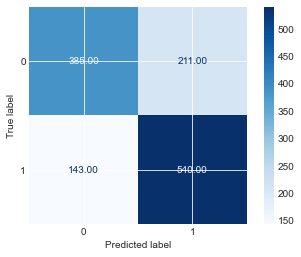

In [83]:
y_pred = sgd.predict(X_train)
print(classification_report(y_train, y_pred))
plot_confusion_matrix(sgd, X_train, y_train, cmap = plt.cm.Blues, values_format = '.2f')
plt.show()

**PERCEPTRON**

In [84]:
pctn = Perceptron()
parameters = {"penalty": ('l2','l1','elasticnet')}
gscv = GridSearchCV(pctn, param_grid = parameters, cv = 10, return_train_score = True, scoring = "accuracy")
gscv.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=Perceptron(),
             param_grid={'penalty': ('l2', 'l1', 'elasticnet')},
             return_train_score=True, scoring='accuracy')

In [85]:
gscv_res = pd.DataFrame(gscv.cv_results_).sort_values("rank_test_score")
gscv_res.head(1)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_penalty,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
1,0.007938,0.002645,0.000494,0.000494,l1,{'penalty': 'l1'},0.570312,0.75,0.59375,0.695312,...,0.622937,0.688966,0.701998,0.704605,0.545613,0.648132,0.669852,0.649306,0.647815,0.047113


In [86]:
pctn = Perceptron(penalty = "l1")
pctn.fit(X_train, y_train)

Perceptron(penalty='l1')

              precision    recall  f1-score   support

           0       0.66      0.77      0.71       596
           1       0.76      0.65      0.70       683

    accuracy                           0.71      1279
   macro avg       0.71      0.71      0.71      1279
weighted avg       0.71      0.71      0.70      1279



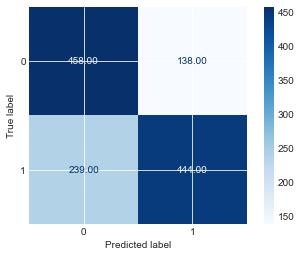

In [87]:
y_pred = pctn.predict(X_train)
print(classification_report(y_train, y_pred))
plot_confusion_matrix(pctn, X_train, y_train, cmap = plt.cm.Blues, values_format = '.2f')
plt.show()

**PASSIVE AGGRESIVE**

In [88]:
paag = PassiveAggressiveClassifier()
parameters = {"C": range(1, 6)}
gscv = GridSearchCV(paag, param_grid = parameters, cv = 10, return_train_score = True, scoring = "accuracy")
gscv.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=PassiveAggressiveClassifier(),
             param_grid={'C': range(1, 6)}, return_train_score=True,
             scoring='accuracy')

In [89]:
gscv_res = pd.DataFrame(gscv.cv_results_).sort_values("rank_test_score")
gscv_res.head(1)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
4,0.002277,0.000795,0.000398,0.000488,5,{'C': 5},0.53125,0.59375,0.6875,0.695312,...,0.70808,0.702867,0.603823,0.682016,0.7298,0.538662,0.662033,0.600694,0.628532,0.084292


In [90]:
paag = PassiveAggressiveClassifier(C = 5)
paag.fit(X_train, y_train)

PassiveAggressiveClassifier(C=5)

              precision    recall  f1-score   support

           0       0.71      0.55      0.62       596
           1       0.67      0.81      0.73       683

    accuracy                           0.69      1279
   macro avg       0.69      0.68      0.68      1279
weighted avg       0.69      0.69      0.68      1279



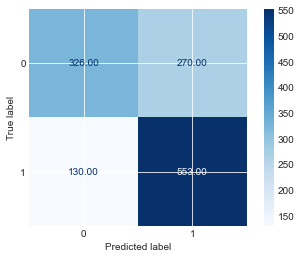

In [91]:
y_pred = paag.predict(X_train)
print(classification_report(y_train, y_pred))
plot_confusion_matrix(paag, X_train, y_train, cmap = plt.cm.Blues, values_format = '.2f')
plt.show()

**LDA**

In [92]:
lda = LinearDiscriminantAnalysis()
parameters = {"solver": ('svd', 'lsqr', 'eigen')}
gscv = GridSearchCV(lda, param_grid = parameters, cv = 10, return_train_score = True, scoring = "accuracy")
gscv.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=LinearDiscriminantAnalysis(),
             param_grid={'solver': ('svd', 'lsqr', 'eigen')},
             return_train_score=True, scoring='accuracy')

In [93]:
gscv_res = pd.DataFrame(gscv.cv_results_).sort_values("rank_test_score")
gscv_res.head(1)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_solver,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.00615,0.00254,0.000851,0.000469,svd,{'solver': 'svd'},0.726562,0.765625,0.75,0.703125,...,0.742832,0.747176,0.742832,0.749783,0.74457,0.74457,0.743701,0.746528,0.745374,0.003245


In [94]:
lda = LinearDiscriminantAnalysis(solver = "svd")
lda.fit(X_train, y_train)

LinearDiscriminantAnalysis()

              precision    recall  f1-score   support

           0       0.72      0.74      0.73       596
           1       0.77      0.74      0.76       683

    accuracy                           0.74      1279
   macro avg       0.74      0.74      0.74      1279
weighted avg       0.74      0.74      0.74      1279



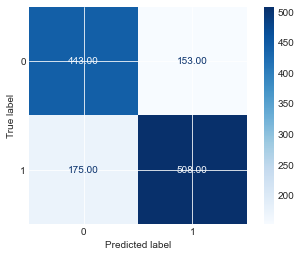

In [95]:
y_pred = lda.predict(X_train)
print(classification_report(y_train, y_pred))
plot_confusion_matrix(lda, X_train, y_train, cmap = plt.cm.Blues, values_format = '.2f')
plt.show()

**QDA**

In [96]:
qda = QuadraticDiscriminantAnalysis()
parameters = {}
gscv = GridSearchCV(qda, param_grid = parameters, cv = 10, return_train_score = True, scoring = "accuracy")
gscv.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=QuadraticDiscriminantAnalysis(), param_grid={},
             return_train_score=True, scoring='accuracy')

In [97]:
gscv_res = pd.DataFrame(gscv.cv_results_).sort_values("rank_test_score")
gscv_res.head(1)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,...,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.001961,0.001129,0.000751,0.000415,{},0.695312,0.734375,0.773438,0.710938,0.734375,...,0.741095,0.741964,0.740226,0.746308,0.756733,0.735013,0.747176,0.74566,0.7452,0.006468


In [98]:
qda = QuadraticDiscriminantAnalysis()
qda.fit(X_train, y_train)

QuadraticDiscriminantAnalysis()

              precision    recall  f1-score   support

           0       0.76      0.67      0.72       596
           1       0.74      0.82      0.78       683

    accuracy                           0.75      1279
   macro avg       0.75      0.75      0.75      1279
weighted avg       0.75      0.75      0.75      1279



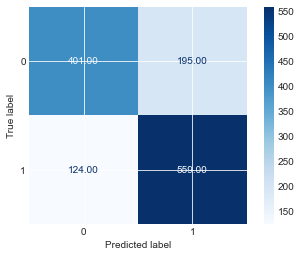

In [99]:
y_pred = qda.predict(X_train)
print(classification_report(y_train, y_pred))
plot_confusion_matrix(qda, X_train, y_train, cmap = plt.cm.Blues, values_format = '.2f')
plt.show()

**SVC**

In [29]:
svc = SVC()
parameters = {"C": [1, 2, 3], "kernel": ("linear", "poly", "rbf", "sigmoid")}
gscv = GridSearchCV(svc, param_grid = parameters, cv = 10, scoring = "accuracy")
gscv.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': [1, 2, 3],
                         'kernel': ('linear', 'poly', 'rbf', 'sigmoid')},
             scoring='accuracy')

In [30]:
gscv_res = pd.DataFrame(gscv.cv_results_).sort_values("rank_test_score")
gscv_res.head(5)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
2,0.048919,0.010783,0.004096,0.001133,1,rbf,"{'C': 1, 'kernel': 'rbf'}",0.695312,0.812500,0.757812,0.710938,0.781250,0.765625,0.796875,0.757812,0.742188,0.771654,0.759197,0.034128,1
10,0.047290,0.001522,0.003625,0.000454,3,rbf,"{'C': 3, 'kernel': 'rbf'}",0.687500,0.789062,0.765625,0.734375,0.757812,0.757812,0.796875,0.734375,0.742188,0.779528,0.754515,0.030353,2
6,0.050151,0.008748,0.003875,0.000693,2,rbf,"{'C': 2, 'kernel': 'rbf'}",0.687500,0.789062,0.765625,0.726562,0.773438,0.765625,0.796875,0.734375,0.750000,0.755906,0.754497,0.030485,3
9,0.050622,0.004725,0.002693,0.000457,3,poly,"{'C': 3, 'kernel': 'poly'}",0.703125,0.789062,0.742188,0.750000,0.789062,0.703125,0.781250,0.718750,0.726562,0.834646,0.753777,0.041270,4
1,0.052211,0.011043,0.003673,0.001048,1,poly,"{'C': 1, 'kernel': 'poly'}",0.695312,0.757812,0.750000,0.734375,0.765625,0.710938,0.804688,0.750000,0.734375,0.811024,0.751415,0.034648,5


In [31]:
svc = SVC(C = 1, kernel = "rbf")
svc.fit(X_train, y_train)

SVC(C=1)

              precision    recall  f1-score   support

           0       0.78      0.80      0.79       596
           1       0.82      0.80      0.81       683

    accuracy                           0.80      1279
   macro avg       0.80      0.80      0.80      1279
weighted avg       0.80      0.80      0.80      1279



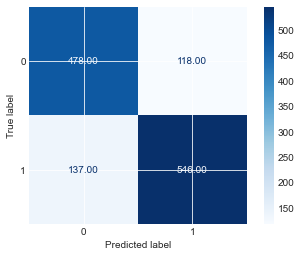

In [32]:
y_pred = svc.predict(X_train)
print(classification_report(y_train, y_pred))
plot_confusion_matrix(svc, X_train, y_train, cmap = plt.cm.Blues, values_format = '.2f')
plt.show()

**GAUSSIAN NB**

In [33]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)

GaussianNB()

              precision    recall  f1-score   support

           0       0.69      0.73      0.71       596
           1       0.75      0.72      0.73       683

    accuracy                           0.72      1279
   macro avg       0.72      0.72      0.72      1279
weighted avg       0.72      0.72      0.72      1279



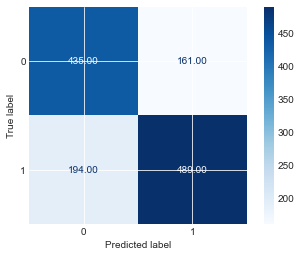

In [34]:
y_pred = gnb.predict(X_train)
print(classification_report(y_train, y_pred))
plot_confusion_matrix(gnb, X_train, y_train, cmap = plt.cm.Blues, values_format = '.2f')
plt.show()

**BERNOULLI NB**

In [100]:
bnb = BernoulliNB()
parameters = {"alpha": range(1, 6)}
gscv = GridSearchCV(bnb, param_grid = parameters, cv = 10, return_train_score = True, scoring = "accuracy")
gscv.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=BernoulliNB(), param_grid={'alpha': range(1, 6)},
             return_train_score=True, scoring='accuracy')

In [101]:
gscv_res = pd.DataFrame(gscv.cv_results_).sort_values("rank_test_score")
gscv_res.head(1)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
1,0.001837,0.000885,0.000559,0.000471,2,{'alpha': 2},0.664062,0.71875,0.71875,0.679688,...,0.721112,0.711555,0.720243,0.712424,0.715899,0.712424,0.724587,0.709201,0.715056,0.005036


In [102]:
bnb = BernoulliNB(alpha = 2)
bnb.fit(X_train, y_train)

BernoulliNB(alpha=2)

              precision    recall  f1-score   support

           0       0.69      0.70      0.70       596
           1       0.73      0.73      0.73       683

    accuracy                           0.71      1279
   macro avg       0.71      0.71      0.71      1279
weighted avg       0.71      0.71      0.71      1279



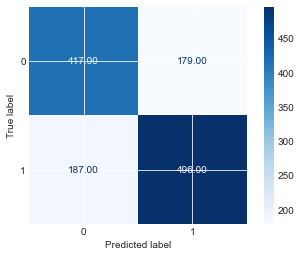

In [103]:
y_pred = bnb.predict(X_train)
print(classification_report(y_train, y_pred))
plot_confusion_matrix(bnb, X_train, y_train, cmap = plt.cm.Blues, values_format = '.2f')
plt.show()

**DECISION TREE**

In [35]:
dct = DecisionTreeClassifier()
parameters = {"criterion": ("gini", "entropy"), "max_depth": list(range(1, 11)), "min_samples_split": list(range(2, 11)), "min_samples_leaf": list(range(1, 11))}
gscv = GridSearchCV(dct, param_grid = parameters, cv = 10, scoring = "accuracy")
gscv.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ('gini', 'entropy'),
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9, 10]},
             scoring='accuracy')

In [36]:
gscv_res = pd.DataFrame(gscv.cv_results_).sort_values("rank_test_score")
gscv_res.head(5)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,...,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
810,0.007978,3.814697e-07,0.000299,0.000457,gini,10,1,2,"{'criterion': 'gini', 'max_depth': 10, 'min_sa...",0.664062,...,0.773438,0.773438,0.750000,0.742188,0.695312,0.820312,0.795276,0.747496,0.045525,1
720,0.007594,4.713241e-04,0.000299,0.000457,gini,9,1,2,"{'criterion': 'gini', 'max_depth': 9, 'min_sam...",0.695312,...,0.773438,0.734375,0.742188,0.726562,0.687500,0.796875,0.771654,0.744353,0.033003,2
1565,0.010171,1.716187e-03,0.000732,0.000486,entropy,8,4,10,"{'criterion': 'entropy', 'max_depth': 8, 'min_...",0.671875,...,0.742188,0.664062,0.726562,0.718750,0.718750,0.789062,0.834646,0.742058,0.050634,3
1564,0.010251,1.803086e-03,0.000599,0.000489,entropy,8,4,9,"{'criterion': 'entropy', 'max_depth': 8, 'min_...",0.671875,...,0.726562,0.671875,0.742188,0.703125,0.718750,0.789062,0.834646,0.741277,0.050445,4
1547,0.008476,4.987479e-04,0.000599,0.000489,entropy,8,2,10,"{'criterion': 'entropy', 'max_depth': 8, 'min_...",0.671875,...,0.742188,0.671875,0.750000,0.703125,0.726562,0.765625,0.834646,0.741277,0.048218,4


In [37]:
dct = DecisionTreeClassifier(criterion = "gini", max_depth = 10, min_samples_leaf = 1, min_samples_split = 2)
dct.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10)

              precision    recall  f1-score   support

           0       0.95      0.92      0.94       596
           1       0.93      0.96      0.95       683

    accuracy                           0.94      1279
   macro avg       0.94      0.94      0.94      1279
weighted avg       0.94      0.94      0.94      1279



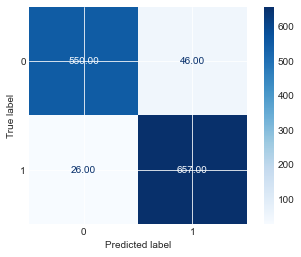

In [38]:
y_pred = dct.predict(X_train)
print(classification_report(y_train, y_pred))
plot_confusion_matrix(dct, X_train, y_train, cmap = plt.cm.Blues, values_format = '.2f')
plt.show()

**FINAL CHECK**

In [104]:
algorithm = {
    'Logistic Regression': LogisticRegression(penalty = "elasticnet", solver = "saga", max_iter = 5000, C = 0.2, l1_ratio = 0.8),
    'Ridge Classifier': RidgeClassifier(alpha = 1),
    'K Neighbors Classifier': KNeighborsClassifier(n_neighbors = 14, leaf_size = 23, p = 2),
    'SGD Classifier': SGDClassifier(penalty = "elasticnet", l1_ratio = 0.6),
    'Perceptron': Perceptron(penalty = "l1"),
    'Passive Aggressive Classifier': PassiveAggressiveClassifier(C = 5),
    'Linear Discriminant Analysis': LinearDiscriminantAnalysis(solver = "svd"),
    'Quadratic Discriminant Analysis': QuadraticDiscriminantAnalysis(),
    'SVC': SVC(C = 1, kernel = "rbf"),
    'Gaussian NB': GaussianNB(),
    'Bernoulli NB': BernoulliNB(),
    'Decision Tree Classifier': DecisionTreeClassifier(criterion = "gini", max_depth = 10, min_samples_leaf = 1, min_samples_split = 2)
}

In [105]:
def get_scoring(model):
    scores = {}
    score = cross_validate(estimator = model, X = X_train, y = y_train, cv = 10,
                  scoring = ['accuracy', "f1", "recall", "precision", "roc_auc"])
    for key, value in score.items():
        scores[key] = (round(value.mean(),4))
        scores[key + 'std'] = (round(value.std(),4))
    return scores

In [106]:
results = {}
parameter = None
for key, value in algorithm.items():
    results[key] = get_scoring(value)
results = pd.DataFrame(results)
results = results.rename(index = {'fit_time': 'Fit Time',
                                  'score_time': 'Score Time',
                                  'test_accuracy': 'Accuracy',
                                  'test_f1': 'F1',
                                  'test_recall': 'Recall',
                                  'test_precision': 'Precision',
                                  'test_roc_auc': 'AUC',
                                  'score_timestd': 'Score Time Std',
                                  'test_accuracystd': 'Accuracy Std',
                                  'test_f1std': 'F1 Std',
                                  'test_recallstd': 'Recall Std',
                                  'test_precisionstd': 'Precision Std',
                                  'test_roc_aucstd': 'AUC Std'
                                 })

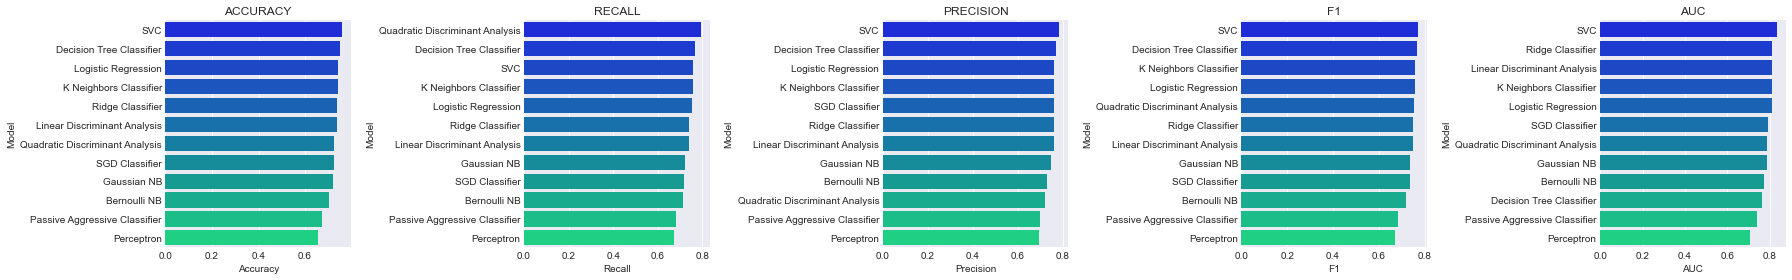

In [107]:
results = results.T.reset_index()
results.rename(columns = {'index': 'Model'}, inplace = True)
results.drop(['Fit Time', 'fit_timestd', 'Score Time', 'Score Time Std'], axis = 1, inplace = True)

# ALGORITHM COMPARISON
fig, ax = plt.subplots(1, 5, figsize = (25, 4))
sns.barplot(x = 'Accuracy', y = 'Model', data = results.sort_values('Accuracy', ascending = False), palette = 'winter', ax = ax[0])
sns.barplot(x = 'Recall', y = 'Model', data = results.sort_values('Recall', ascending = False), palette = 'winter', ax = ax[1])
sns.barplot(x = 'Precision', y = 'Model', data = results.sort_values('Precision', ascending = False), palette = 'winter', ax = ax[2])
sns.barplot(x = 'F1', y = 'Model', data = results.sort_values('F1', ascending = False), palette = 'winter', ax = ax[3])
sns.barplot(x = 'AUC', y = 'Model', data = results.sort_values('AUC', ascending = False), palette = 'winter', ax = ax[4])
ax[0].set_title("ACCURACY")
ax[1].set_title("RECALL")
ax[2].set_title("PRECISION")
ax[3].set_title("F1")
ax[4].set_title("AUC")
plt.tight_layout()
plt.show()

In [108]:
results

,Model,Accuracy,Accuracy Std,F1,F1 Std,Recall,Recall Std,Precision,Precision Std,AUC,AUC Std
0,Logistic Regression,0.7436,0.0228,0.7582,0.0237,0.7541,0.0336,0.7632,0.0235,0.8083,0.0279
1,Ridge Classifier,0.7365,0.0266,0.7494,0.0284,0.7395,0.0403,0.7607,0.0254,0.8108,0.0269
2,K Neighbors Classifier,0.7436,0.0321,0.7592,0.0294,0.7571,0.0395,0.7629,0.0380,0.8104,0.0431
3,SGD Classifier,0.7240,0.0339,0.7342,0.0311,0.7160,0.0709,0.7629,0.0599,0.7937,0.0444
4,Perceptron,0.6568,0.0637,0.6692,0.0870,0.6709,0.1442,0.6954,0.0768,0.7070,0.0656
5,Passive Aggressive Classifier,0.6724,0.0669,0.6842,0.0858,0.6826,0.1383,0.6990,0.0660,0.7394,0.0607
6,Linear Discriminant Analysis,0.7365,0.0266,0.7494,0.0284,0.7395,0.0403,0.7607,0.0254,0.8108,0.0269
7,Quadratic Discriminant Analysis,0.7248,0.0276,0.7541,0.0269,0.7922,0.0484,0.7214,0.0275,0.7874,0.0269
8,SVC,0.7592,0.0341,0.7710,0.0305,0.7585,0.0347,0.7853,0.0422,0.8327,0.0312
9,Gaussian NB,0.7217,0.0229,0.7344,0.0229,0.7219,0.0422,0.7500,0.0311,0.7866,0.0278


**ENSEMBLE - VOTING**

In [109]:
clf1 = SVC(C = 1, kernel = "rbf")
clf2 = DecisionTreeClassifier(criterion = "gini", max_depth = 10, min_samples_leaf = 1, min_samples_split = 2)
clf3 = LogisticRegression(penalty = "elasticnet", solver = "saga", max_iter = 5000, C = 0.2, l1_ratio = 0.8)
clf4 = KNeighborsClassifier(n_neighbors = 14, leaf_size = 23, p = 2)
clf5 = RidgeClassifier(alpha = 1)
eclf = VotingClassifier(estimators=[("svc", clf1), ("dct", clf2), ("lr", clf3), ("knn", clf4), ("rr", clf5)], voting='hard')
eclf = eclf.fit(X_train, y_train)

              precision    recall  f1-score   support

           0       0.77      0.81      0.79       596
           1       0.82      0.79      0.81       683

    accuracy                           0.80      1279
   macro avg       0.80      0.80      0.80      1279
weighted avg       0.80      0.80      0.80      1279



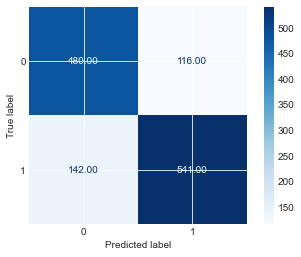

In [110]:
y_pred = eclf.predict(X_train)
print(classification_report(y_train, y_pred))
plot_confusion_matrix(eclf, X_train, y_train, cmap = plt.cm.Blues, values_format = '.2f')
plt.show()

              precision    recall  f1-score   support

           0       0.75      0.76      0.75       148
           1       0.79      0.78      0.78       172

    accuracy                           0.77       320
   macro avg       0.77      0.77      0.77       320
weighted avg       0.77      0.77      0.77       320



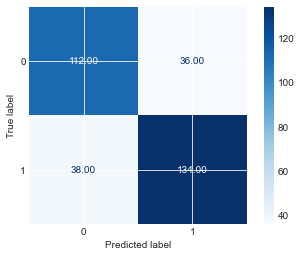

In [111]:
y_pred = eclf.predict(X_test)
print(classification_report(y_test, y_pred))
plot_confusion_matrix(eclf, X_test, y_test, cmap = plt.cm.Blues, values_format = '.2f')
plt.show()